In [7]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv("hard_dataset.csv")
x = data.drop(columns='y').values
y = data['y'].values

In [9]:
learning_rate = 1
max_epoch = 500
num_features = x.shape[1]

In [10]:
w = np.zeros(num_features)
b = 0
best_weight = np.copy(w)
best_bias = b
max_accuracy = 0
e = 0

In [11]:
for epoch in range(1,max_epoch + 1):
    missclassfied_count = 0
    for xi,yi in zip(x,y):
        z = np.dot(w,xi) + b 
        y_pred = 1 if z >= 0 else 0
        if y_pred != yi:
            w += learning_rate*(yi - y_pred) * xi
            b += learning_rate*(yi - y_pred)
            missclassfied_count += 1
    accuracy = (len(x) - missclassfied_count) /len(x) * 100
    print(f"Epoch {epoch}, Accuracy: {accuracy:.2f}%")
    if accuracy > max_accuracy:
        best_weights = np.copy(w)
        best_bias = b
        max_accuracy = accuracy
        e = epoch
    if accuracy == 100:
        print("All points classified correctly. Stopping early.")
        break

Epoch 1, Accuracy: 66.50%
Epoch 2, Accuracy: 66.20%
Epoch 3, Accuracy: 66.60%
Epoch 4, Accuracy: 65.20%
Epoch 5, Accuracy: 63.50%
Epoch 6, Accuracy: 66.10%
Epoch 7, Accuracy: 66.80%
Epoch 8, Accuracy: 65.50%
Epoch 9, Accuracy: 65.50%
Epoch 10, Accuracy: 64.80%
Epoch 11, Accuracy: 65.30%
Epoch 12, Accuracy: 64.40%
Epoch 13, Accuracy: 67.30%
Epoch 14, Accuracy: 66.10%
Epoch 15, Accuracy: 63.50%
Epoch 16, Accuracy: 65.30%
Epoch 17, Accuracy: 64.50%
Epoch 18, Accuracy: 65.00%
Epoch 19, Accuracy: 64.80%
Epoch 20, Accuracy: 64.30%
Epoch 21, Accuracy: 64.60%
Epoch 22, Accuracy: 66.60%
Epoch 23, Accuracy: 64.00%
Epoch 24, Accuracy: 65.30%
Epoch 25, Accuracy: 64.80%
Epoch 26, Accuracy: 66.10%
Epoch 27, Accuracy: 65.90%
Epoch 28, Accuracy: 66.20%
Epoch 29, Accuracy: 64.90%
Epoch 30, Accuracy: 66.00%
Epoch 31, Accuracy: 65.60%
Epoch 32, Accuracy: 63.40%
Epoch 33, Accuracy: 66.20%
Epoch 34, Accuracy: 65.90%
Epoch 35, Accuracy: 65.10%
Epoch 36, Accuracy: 66.20%
Epoch 37, Accuracy: 65.00%
Epoch 38, 

In [12]:
print("\nBest weights:", best_weights)
print("Best bias:", best_bias)
print("Decision boundary: ", end="")
boundary_eq = " + ".join([f"{best_weights[i]}*x{i+1}" for i in range(len(best_weights))])
print(f"{boundary_eq} + {best_bias} = 0")
print(f"max accuracy of among all the epoches at epoch {e} is :{max_accuracy}")


Best weights: [-0.05850957 -2.17958904]
Best bias: -3
Decision boundary: -0.058509574196415226*x1 + -2.1795890420084314*x2 + -3 = 0
max accuracy of among all the epoches at epoch 13 is :67.30000000000001


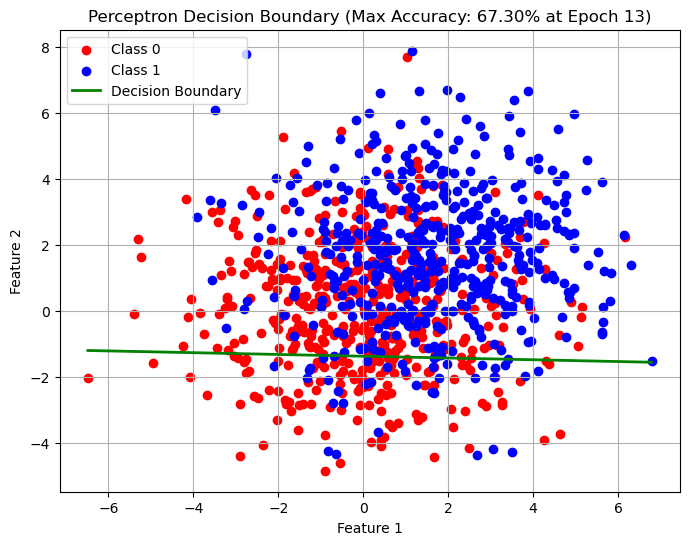

: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class0 = x[y == 0]
class1 = x[y == 1]

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(class0[:, 0], class0[:, 1], color='red', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')

In [ ]:
x1_vals = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
x2_vals = (-best_weights[0] * x1_vals - best_bias) / best_weights[1]
plt.plot(x1_vals, x2_vals, color='green', linewidth=2, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron Decision Boundary (Max Accuracy: {max_accuracy:.2f}% at Epoch {e})')
plt.legend()
plt.grid(True)
plt.show()